### PROBLEM STATEMENT
*"Build a customized CNN model for flower recognition"*

- Ayushmaan Das (E0121037)

### Loading required Modules

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from PIL import Image

<hr>

### Image Augmentation and Data Preparation

In [2]:
# !unzip /content/flowers.zip

train_path = "./flowers/train"
test_path = "./flowers/validation"

Sample Image

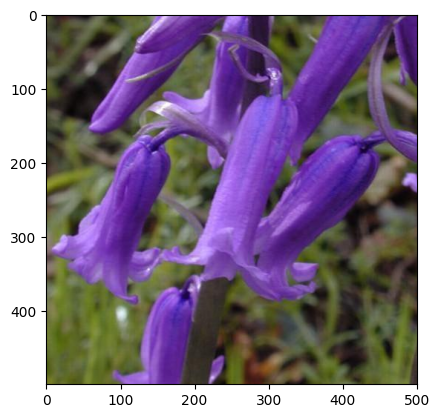

In [3]:
img = Image.open("/content/flowers/train/bluebell/image_0251.jpg")

plt.imshow(img)
plt.show()

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(150,150), batch_size=20, class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path, target_size=(150,150), batch_size=20, class_mode='categorical')

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


<hr>

### Model Building

In [6]:
model = Sequential()

input_shape = (150, 150, 3)

Convolutions and Poooling

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

Flattening and Fully Connected Networks

In [8]:
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

<hr>

### Model Compilation and Training

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
hist = model.fit(
    training_set, validation_data=test_set, epochs = 10, steps_per_epoch=len(training_set), validation_steps=len(test_set)
)

Epoch 1/10
60/60 [==============================] - 88s 1s/step - loss: 2.7305 - accuracy: 0.1059 - val_loss: 2.4198 - val_accuracy: 0.1765
Epoch 2/10
60/60 [==============================] - 72s 1s/step - loss: 2.5316 - accuracy: 0.1353 - val_loss: 2.2629 - val_accuracy: 0.2059
Epoch 3/10
60/60 [==============================] - 83s 1s/step - loss: 2.4001 - accuracy: 0.1891 - val_loss: 2.1179 - val_accuracy: 0.2824
Epoch 4/10
60/60 [==============================] - 74s 1s/step - loss: 2.2821 - accuracy: 0.2109 - val_loss: 2.0587 - val_accuracy: 0.2471
Epoch 5/10
60/60 [==============================] - 71s 1s/step - loss: 2.1629 - accuracy: 0.2513 - val_loss: 1.8288 - val_accuracy: 0.3235
Epoch 6/10
60/60 [==============================] - 71s 1s/step - loss: 2.0934 - accuracy: 0.2639 - val_loss: 1.8987 - val_accuracy: 0.2706
Epoch 7/10
60/60 [==============================] - 76s 1s/step - loss: 1.9595 - accuracy: 0.3143 - val_loss: 1.6452 - val_accuracy: 0.3824
Epoch 8/10
60/60 [==

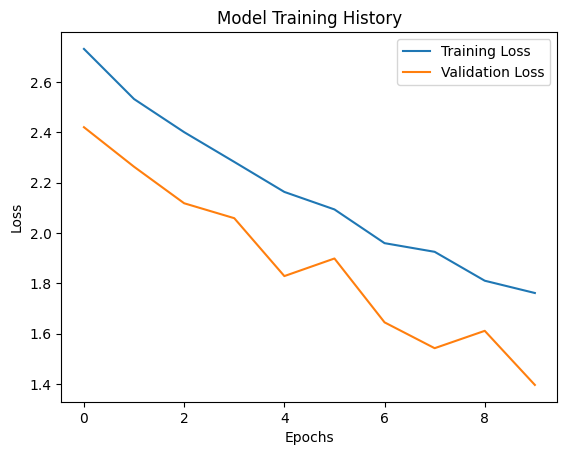

In [13]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training History')
plt.legend()
plt.show()

<hr>

### Predictions using generated model

In [14]:
img_path = 'daisy-test.jpg'
img = image.load_img(img_path, target_size=(150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

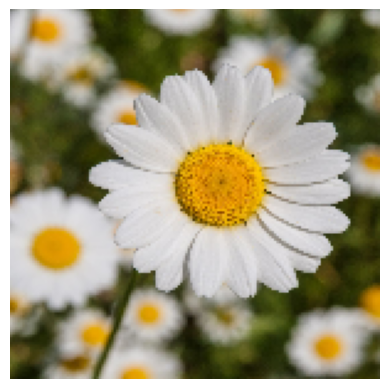

In [15]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [16]:
preds = model.predict(img_array)
print(preds)

1/1 [==============================] - 0s 223ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [21]:
predicted_class_idx = np.argmax(preds[0])

predicted_class_idx

13

<hr><hr>